# Amdahl's Law

In [2]:
# import symbolic capability to Python
from sympy import *
# print things all pretty
from sympy.abc import *
from sympy.plotting import plot
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
init_printing()

Variables:
* $T_{1}$: Total runtime of a Task with one CPU / Core / Node
* $T_{s}$:	Runtime of sequential part (can **not** be parallelized)
* $T_{p}$:	Runtime of parallelizable part (can be parallelized)

In [3]:
T_1 = symbols("T_1", positive=True, real=True)
T_s = symbols("T_s", positive=True, real=True)
T_p = symbols("T_p", positive=True, real=True)

In [4]:
runtime_equation = Eq(T_1, T_s + T_p)
runtime_equation

* $f$:	Parallelizable fraction of program, $f \in [0, 1]$

In [5]:
f = symbols("f", positive=True, real=True)

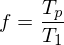

In [6]:
fraction_equation = Eq(f, T_p / T_1)
fraction_equation

In [7]:
result_tp = solve(fraction_equation, T_p)[0]
result_tp

In [8]:
result_ts = solve(runtime_equation, T_s)[0]
result_ts = result_ts.subs(T_p, result_tp)
result_ts

* $n$: CPUs / Cores / Nodes
* $T_n(n)$	Runtime with n processor
* $T_{n} = T_{s} + \frac{T_{p}}{n}$

In [9]:
n = symbols("n", positive=True, real=True)
T_n = symbols("T_{n}", positive=True, real=True)

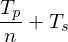

In [10]:
T_n =  T_s + T_p / n
T_n

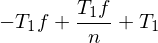

In [11]:
T_n = T_n.subs(T_p, result_tp).subs(T_s, result_ts)
T_n

* $S(n)$: Speedup with n Cores vs. 1 Core
* $S(n) = \frac{T_{1}}{T_{n}(n)}$
* $S(n) = \frac{1}{(1-f)+\frac{f}{n}}$

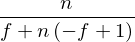

In [12]:
S = symbols("S", positive=True, real=True)
S = T_1 / T_n
S = simplify(S)
display(S)

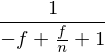

In [13]:
numerator = numer(S)
denominator = denom(S)
numerator = simplify(numerator* 1/n)
denominator = simplify(denominator * 1/n)
display(numerator / denominator)

* $S(n) = \frac{1}{(1-f)+\frac{f}{n}}$
* $\displaystyle \lim_{n \rightarrow \infty} S(n) = \frac{1}{1-f}$

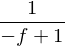

In [14]:
limit(S, n, oo)

In [15]:
xrange = [2**i for i in range(0,17)]
xrange

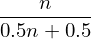

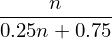

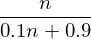

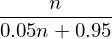

In [16]:
S50 = S.subs(f, 0.5)
display(S50)
S75 = S.subs(f, 0.75)
display(S75)
S90 = S.subs(f, 0.90)
display(S90)
S95 = S.subs(f, 0.95)
display(S95)

In [17]:
y_S50 = [S50.subs(n, x) for x in xrange]
print(y_S50)
y_S75 = [S75.subs(n, x) for x in xrange]
print(y_S75)
y_S90 = [S90.subs(n, x) for x in xrange]
print(y_S90)
y_S95 = [S95.subs(n, x) for x in xrange]
print(y_S95)

[1.00000000000000, 1.33333333333333, 1.60000000000000, 1.77777777777778, 1.88235294117647, 1.93939393939394, 1.96923076923077, 1.98449612403101, 1.99221789883268, 1.99610136452242, 1.99804878048780, 1.99902391410444, 1.99951183793019, 1.99975588917368, 1.99987793713763, 1.99993896670634, 1.99996948288753]
[1.00000000000000, 1.60000000000000, 2.28571428571429, 2.90909090909091, 3.36842105263158, 3.65714285714286, 3.82089552238806, 3.90839694656489, 3.95366795366795, 3.97669902912621, 3.98831548198637, 3.99414919551438, 3.99707245669676, 3.99853569249542, 3.99926771221090, 3.99963382258704, 3.99981690291277]
[1.00000000000000, 1.81818181818182, 3.07692307692308, 4.70588235294118, 6.40000000000000, 7.80487804878049, 8.76712328767123, 9.34306569343066, 9.66037735849057, 9.82725527831094, 9.91287512100678, 9.95624696159456, 9.97807551766139, 9.98902572856969, 9.99450985176600, 9.99725417213290, 9.99862689755130]
[1.00000000000000, 1.90476190476190, 3.47826086956522, 5.92592592592592, 9.1428

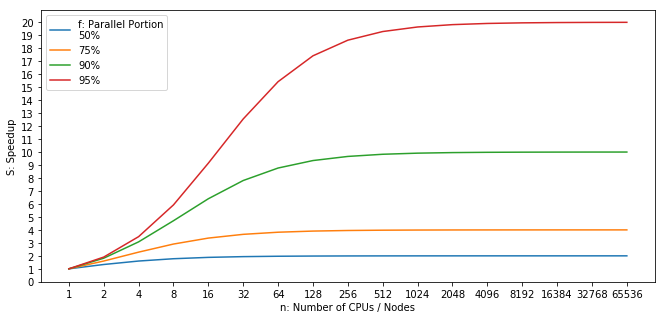

In [19]:
x_tick_labels = [str(x) for x in xrange]
fig, ax = plt.subplots(figsize=(11, 5))
plt.plot(y_S50, label="f: Parallel Portion\n50%")
plt.plot(y_S75, label="75%")
plt.plot(y_S90, label="90%")
plt.plot(y_S95, label="95%")
ax.legend()
plt.xticks(np.arange(0, 17, 1))
plt.yticks(np.arange(0, 21, 1))
ax.set_xticklabels(x_tick_labels)
plt.xlabel("n: Number of CPUs / Nodes")
plt.ylabel("S: Speedup")
plt.show()